# Project: Investigate the TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About the dataset

The chosen dataset is: TMDb movie data (cleaned from original data on Kaggle) <br>
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<br>
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
<br>
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
<br>
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

The 21 columns in this dataset: <br>
1. id: unique ids for each row
2. imdb_id: iMDB ids
3. popularity - popularity score
4. budget - budget in USD
5. revenue - revenue in USD
6. original_title - movie title
7. cast - cast of each movie
8. homepage - website link of each movie
9. director - director name
10. tagline - tagline of the movie
11. keywords - words that give the idea of the movie
12. overview - general plot of the movie
13. runtime - movie duration in minutes
14. genres - genre of the movie
15. production_companies - the production companies that produced the movie
16. release_date - release date of the movie
17. vote_count - number of votes given by viewers
18. vote_average - average vote (rating) given by viewers
19. release_year - the year of each movie release
20. budget_adj - budget in 2010 dollars, adjusted for inflation
21. revenue_adj - revenue in 2010 dollars, adjusted for inflation

The questions this investigation explores are: <br>
1. What attributes have the highest correlation between each other? <br>
2. What genre was the most released each year? And how many movies were released under each genre? <br>
3. What is the average rating of each genre? <br>
4. What is the biggest production of each year from 1960 to 2015? <br>
5. What is the highest-grossing movie of each year between 1960 and 2015? <br>
6. What is the general trend between popularity and the vote count? <br>
7. What is the general trend between Release Year and Popularity? <br>
8. How did the movies budgets change over the years? <br>
9. How many movies were released per month? <br>
10. What is the average runtime of movies? And what is the most common runtime? <br>
11. What are the production companies with the most releases? <br>
12. What are the most popular and the least popular movies? <br>
13. Who are the most popular movie stars? <br>
14. How did the number of released movies change over the years? <br>
15. What are the properties of each category of movies based on the movie budget? <br>
16. What are the properties of each category of movies based on the movie rating? <br>

First, the necessary libraries are loaded.

In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install impyute
from impyute.imputation.cs import mice

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Once the data is loaded, the following procedures are needed: <br>
● Remove unnecessary information that are not useful for analysis (e.g. homepage, tagline, etc.) <br>
● Change data types if needed (e.g. convert the release date to datetime and extract month and weekday) <br>
● Inspection for any duplicated values (e.g. duplicate movie entries) <br>
● Inspection for any erratic values (values that do not make sense, e.g. dropping movies with a runtime of 0 minutes!) <br>
● Handling any null values (e.g. imputation of null budget or null revenue values using MICE) <br>
● Split the multiple values separated by pipe (|) characters to multiple columns

In [4]:
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv') #load the data
df.head() #show the first five entries

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape #shape of the dataset (rows, columns)

(10866, 21)

In [6]:
df.dtypes #datatype of each column

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
df.info() #number of non-null objects in each column and the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.isnull().sum().sort_values(ascending = False) #no. of null values in each column

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

In [9]:
df.describe() #statistical info of the numerical columns

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

Remove unnecessary information that are not useful for analysis

In [10]:
df.drop(labels = ['imdb_id','homepage','keywords', 'tagline', 'overview'],axis =1,inplace =True)

Remove duplicated entries

In [11]:
df.duplicated().sum() #no. of the duplicated entries

1

In [12]:
df.drop_duplicates(keep='first',inplace = True)

In [13]:
df.shape #shape after duplication removal

(10865, 16)

Convert the release date to datetime and extract month and weekday

In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
df['release_month'] = df['release_date'].dt.month
df['release_weekday'] = df['release_date'].dt.weekday_name

In [16]:
df = df.drop(columns = ['release_date'],axis = 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
release_month           10865 non-null int64
release_weekday         10865 non-null object
dtypes: float64(4), int64(7), object(6)
memory usage: 1.5+ MB


Drop unnecessary missing values

In [18]:
df.dropna(inplace = True)

Dropping entries with runtime = 0

In [19]:
null_runtime = df[df['runtime']==0]

In [20]:
null_runtime.index

Int64Index([92, 334, 445, 486, 1289, 1293, 3329, 3857, 4944, 5695, 5920, 5938,
            6934],
           dtype='int64')

In [21]:
df.drop(labels=null_runtime.index, inplace = True)

Replacing the zeros in Revenue and Budget attributes to np.NAN

In [22]:
df['revenue'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)

In [23]:
df.isnull().sum().sort_values()

id                         0
release_year               0
vote_average               0
vote_count                 0
production_companies       0
release_month              0
runtime                    0
genres                     0
cast                       0
original_title             0
popularity                 0
director                   0
release_weekday            0
budget                  4739
budget_adj              4739
revenue                 5009
revenue_adj             5009
dtype: int64

Imputation of missing values for the Budget and Revenue attributes using using Multivariate Imputation by Chained Equation (MICE)

In [24]:
df_temp = df.select_dtypes(exclude=['object']).copy() #copy numerical columns only

In [25]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 11 columns):
id               9759 non-null int64
popularity       9759 non-null float64
budget           5020 non-null float64
revenue          4750 non-null float64
runtime          9759 non-null int64
vote_count       9759 non-null int64
vote_average     9759 non-null float64
release_year     9759 non-null int64
budget_adj       5020 non-null float64
revenue_adj      4750 non-null float64
release_month    9759 non-null int64
dtypes: float64(6), int64(5)
memory usage: 914.9 KB


In [26]:
df_temp = df_temp.astype('float64') #convert all int64 datatype to float64 for MICE

In [27]:
##source: https://towardsdatascience.com/stop-using-mean-to-fill-missing-data-678c0d396e22
imputed = mice(df_temp.values) #imputation of missing values

In [28]:
budget = imputed[:, 2]
revenue = imputed[:, 3]
budget_adj = imputed[:, 8]
revenue_adj = imputed[:, 9]

Replacing negative values with zeroes

In [29]:
df['budget'] = [0 if value < 0 else value for value in budget] 
df['revenue'] = [0 if value < 0 else value for value in revenue]
df['budget_adj'] = [0 if value < 0 else value for value in budget_adj]
df['revenue_adj'] = [0 if value < 0 else value for value in revenue_adj]

Null values after imputation:

In [30]:
df.isnull().sum().sort_values(ascending = False) #no. of null values in df

release_weekday         0
runtime                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
release_month           0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
id                      0
dtype: int64

Splitting the multiple values separated by pipe (|) characters to multiple columns

In [31]:
movies = df.copy()

In [32]:
cast = (movies['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
genres = (movies['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
director = (movies['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
production_companies = (movies['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

Splitting directors column yields 36 columns! We only need max. 5 directors for each movie so we remove the rest.

In [33]:
director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 36 columns):
director_1     9759 non-null object
director_2     637 non-null object
director_3     105 non-null object
director_4     39 non-null object
director_5     25 non-null object
director_6     21 non-null object
director_7     14 non-null object
director_8     11 non-null object
director_9     8 non-null object
director_10    7 non-null object
director_11    6 non-null object
director_12    4 non-null object
director_13    3 non-null object
director_14    3 non-null object
director_15    3 non-null object
director_16    3 non-null object
director_17    3 non-null object
director_18    3 non-null object
director_19    3 non-null object
director_20    3 non-null object
director_21    3 non-null object
director_22    3 non-null object
director_23    3 non-null object
director_24    3 non-null object
director_25    3 non-null object
director_26    3 non-null object
director_27    3 non-n

In [34]:
director.drop(director.iloc[:, 5:], inplace = True, axis = 1)

In [35]:
director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 5 columns):
director_1    9759 non-null object
director_2    637 non-null object
director_3    105 non-null object
director_4    39 non-null object
director_5    25 non-null object
dtypes: object(5)
memory usage: 457.5+ KB


We join the resulting dataframes together with the cleaned dataframe and we drop the unneeded columns

In [36]:
df = movies.join([cast, genres, director, production_companies])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 37 columns):
id                        9759 non-null int64
popularity                9759 non-null float64
budget                    9759 non-null float64
revenue                   9759 non-null float64
original_title            9759 non-null object
cast                      9759 non-null object
director                  9759 non-null object
runtime                   9759 non-null int64
genres                    9759 non-null object
production_companies      9759 non-null object
vote_count                9759 non-null int64
vote_average              9759 non-null float64
release_year              9759 non-null int64
budget_adj                9759 non-null float64
revenue_adj               9759 non-null float64
release_month             9759 non-null int64
release_weekday           9759 non-null object
cast_1                    9759 non-null object
cast_2                    9676 non-null objec

We do not need the columns we already splitted anymore

In [38]:
movies=df.drop(columns = ['cast', 'director', 'production_companies', 'genres'],axis = 1)

We add the movie id to each entry to the dataframe resulted from splitting columns in case we need them

In [39]:
cast['id'] = movies['id']
genres['id'] = movies['id']
director['id'] = movies['id']
production_companies['id'] = movies['id']

Now we have a clean version of the dataframe and we can save it to a .csv file as a backup

In [40]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 33 columns):
id                        9759 non-null int64
popularity                9759 non-null float64
budget                    9759 non-null float64
revenue                   9759 non-null float64
original_title            9759 non-null object
runtime                   9759 non-null int64
vote_count                9759 non-null int64
vote_average              9759 non-null float64
release_year              9759 non-null int64
budget_adj                9759 non-null float64
revenue_adj               9759 non-null float64
release_month             9759 non-null int64
release_weekday           9759 non-null object
cast_1                    9759 non-null object
cast_2                    9676 non-null object
cast_3                    9623 non-null object
cast_4                    9554 non-null object
cast_5                    9349 non-null object
genres_1                  9759 non-null objec

In [41]:
movies.to_csv('clean_movies.csv',index = False)

<a id='eda'></a>
## Exploratory Data Analysis

### What attributes have the highest correlation between each other?

First we need to investigate the correlation between the attributes

In [42]:
df_corr = movies.select_dtypes(exclude=['object'])
corr = df_corr.corr()

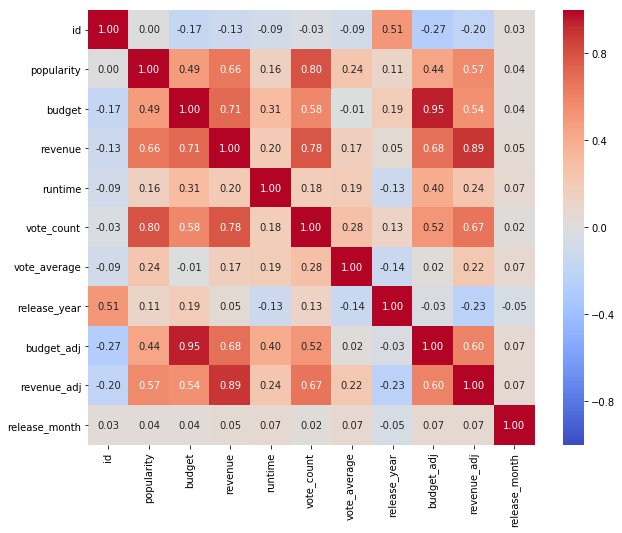

In [179]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap="coolwarm", annot=True, fmt='.2f')

High value in positive (red) or in negative (blue) indicate a high correlation. The diagonal '1's indicate a correlation between the attribute and itself. Low value or close to zero (white) indicate a low correlation.

We list the 15 highest correlated attributes

In [44]:
##source: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_corr, 15))

Top Absolute Correlations
budget      budget_adj      0.951189
revenue     revenue_adj     0.893217
popularity  vote_count      0.803034
revenue     vote_count      0.781627
budget      revenue         0.713050
revenue     budget_adj      0.683752
vote_count  revenue_adj     0.670677
popularity  revenue         0.655374
budget_adj  revenue_adj     0.601862
budget      vote_count      0.583249
popularity  revenue_adj     0.572089
budget      revenue_adj     0.542001
vote_count  budget_adj      0.522577
id          release_year    0.508907
popularity  budget          0.490916
dtype: float64


Comment on the results: <br>
We can see that the highest correlations are budget-budget_adj and revenue-revenue_adj which is expected since they are dependent on each other. However, remarkably high correlations are popularity-vote_count, revenue-vote_count, and budget-revenue.

### What genre was the most released each year? And how many movies were released under each genre?

We create a copy of columns we need from the clean dataset

In [45]:
genre_years = movies[['release_year', 'id']].copy()

We join the years dataframe and the genres dataframe on 'id'

In [46]:
df_genres_dates = pd.merge(genres, genre_years, how="inner", on='id')

In [47]:
df_genres_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 9758
Data columns (total 7 columns):
genres_1        9759 non-null object
genres_2        7805 non-null object
genres_3        4705 non-null object
genres_4        1848 non-null object
genres_5        507 non-null object
id              9759 non-null int64
release_year    9759 non-null int64
dtypes: int64(2), object(5)
memory usage: 609.9+ KB


We create a crosstab on all the 5 genres of each movie and group by the release year

In [48]:
##source: https://stackoverflow.com/questions/55706391/pandas-crosstab-on-multiple-columns-then-groupby
cols = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5']
df1 = (df_genres_dates.melt(id_vars='release_year', value_vars=cols)
         .groupby([pd.Grouper(key='release_year'),'value'])
         .size()
         .unstack(fill_value=0))

In [49]:
df1 = df1.sort_values(by='release_year', ascending=True) #sort by year in ascending order

Now we have the number of movies released each year under each genre of movies

In [50]:
df1

value,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,7,6,1,10,2,0,16,4,1,1,3,3,2,1,7,3,0,0,2,3
1962,6,7,0,5,3,0,19,2,1,1,3,5,1,4,5,2,0,7,2,3
1963,4,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,3,1,3,6,5,4,9,4,0,9,3,1
1965,9,6,1,7,2,0,19,3,0,0,4,4,2,3,5,1,1,10,8,4
1966,14,11,2,15,5,1,15,6,2,2,2,3,0,6,5,6,0,8,4,7
1967,6,6,1,16,7,1,16,3,3,0,0,4,4,3,11,3,0,5,1,2
1968,6,5,3,8,5,0,19,5,5,0,3,4,3,4,6,4,0,5,4,1


Comment on the results: <br> 
The number of Drama movies made every year is noticeably larger than the rest of genres.

We get the genre with the most released movies each year and list them

In [51]:
most_released_genre = df1.idxmax(axis = 1)

In [52]:
most_released_genre

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984    Comedy
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

Comment on the results: <br>
Most of the movies released every year from 1960 to 2015 fall under the Drama genre, except for 11 years in this 55-year-long period when the most releases in these years were Comedy movies.

And we can also get the total number of movies released under each genre over the years between 1960 and 2015

In [53]:
no_of_movies_by_genre = df1.sum(axis = 0)

In [102]:
genre_sort = no_of_movies_by_genre.sort_values(ascending=False)

In [106]:
genre_sort

value
Drama              4362
Comedy             3429
Thriller           2744
Action             2234
Romance            1568
Horror             1521
Adventure          1383
Crime              1299
Science Fiction    1135
Family             1094
Fantasy             839
Mystery             772
Animation           617
Music               338
Documentary         315
History             306
War                 258
Western             160
TV Movie            130
Foreign             120
dtype: int64

These are the total numbers of movies released under each genre from 1960 to 2015.

In [141]:
genre_sort_100 = genre_sort.apply(lambda x: 100 * x / float(genre_sort.sum()))

In [142]:
genre_sort_100

value
Drama              17.714425
Comedy             13.925439
Thriller           11.143600
Action              9.072450
Romance             6.367771
Horror              6.176901
Adventure           5.616472
Crime               5.275341
Science Fiction     4.609324
Family              4.442820
Fantasy             3.407245
Mystery             3.135153
Animation           2.505686
Music               1.372645
Documentary         1.279240
History             1.242690
War                 1.047758
Western             0.649773
TV Movie            0.527940
Foreign             0.487329
dtype: float64

These are the total numbers of movies released under each genre from 1960 to 2015 as percentages compared to other genres.

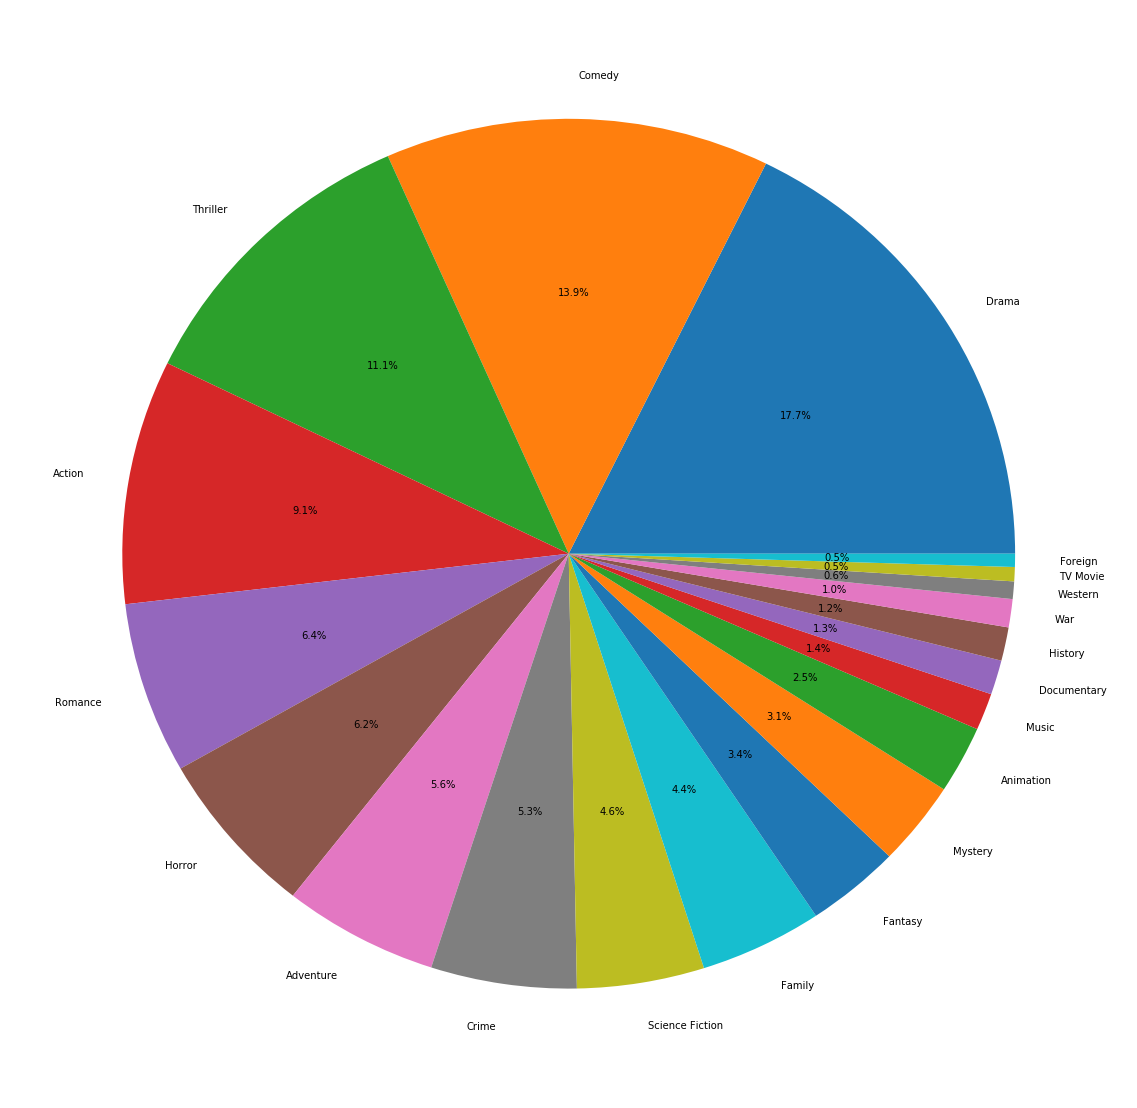

In [140]:
plt.figure(figsize = (20,20));
genre_sort.plot.pie(autopct="%.1f%%");
plt.ylabel("");

Comment on the results: <br> 
The most releases between 1960 and 2015 are Drama and Comedy movies, while the least releases are in TV Movie and Foreign genres.

### What is the average rating of each genre?

In [58]:
genres_rating = movies[['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', 'vote_average']].copy()

We use the copied dataframe columns to create a dataframe of all the genres of each movie and the corresponding average vote of that movie

In [59]:
cols = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5']
genres_rating = pd.DataFrame(genres_rating[cols].values.tolist(), index=genres_rating.vote_average).stack()
genres_rating = genres_rating.reset_index([0, 'vote_average'])
genres_rating.columns = ['vote_average', 'genres']

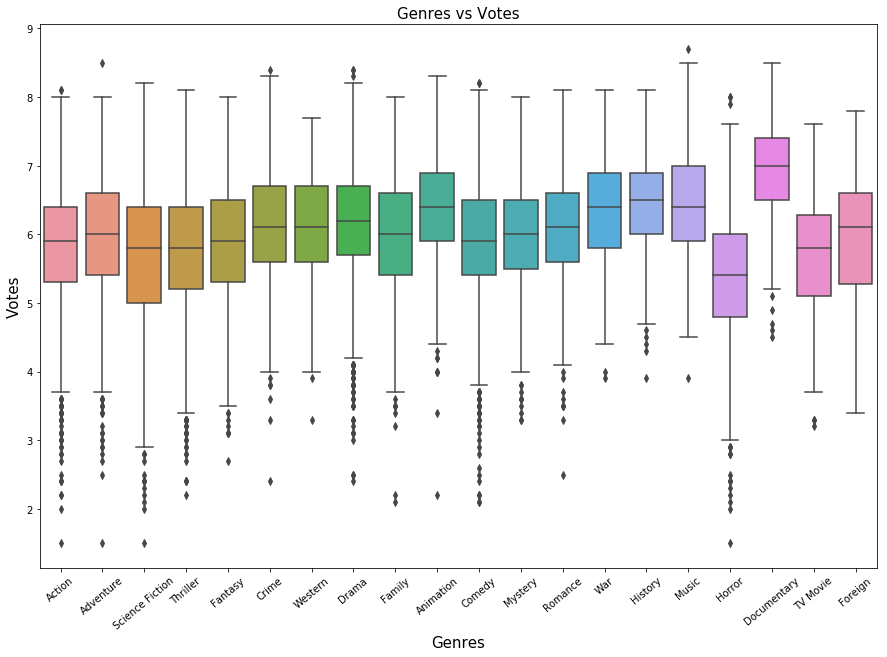

In [60]:
plt.figure(figsize = (15,10));
sns.boxplot(x = 'genres' , y = 'vote_average' , data = genres_rating);
plt.xlabel('Genres',fontsize = 15);
plt.ylabel('Votes',fontsize = 15);
plt.title('Genres vs Votes', fontsize = 15)
plt.xticks(rotation = 40);

Comment on the results: <br>
The Documentary genre has the highest average rating (vote), while the Horror genre receive in average the least rating among all the genres.

### What is the biggest production of each year from 1960 to 2015?

We need to sort the entries by budget then extract the first title for each release year. We use the adjusted budget attribute to determine the biggest budget movie of each year.

In [61]:
def sort_by_budget(df):
    #sort the df by the adjusted budget value and return the first entry
    return df.sort_values(by = 'budget_adj',ascending = False)['original_title'].head(1)

In [62]:
movies.groupby('release_year').apply(sort_by_budget) #group by the release year

release_year       
1960          10143                                      Spartacus
1961          10118                                         El Cid
1962          9850                              Lawrence of Arabia
1963          10443                                      Cleopatra
1964          9887                                    My Fair Lady
1965          10716                   The Greatest Story Ever Told
1966          10824                 The Bible: In the Beginning...
1967          10409                                The Dirty Dozen
1968          9719                           2001: A Space Odyssey
1969          10730                              Battle of Britain
1970          10656                              Tora! Tora! Tora!
1971          9931                        Bedknobs and Broomsticks
1972          7295                                         Avanti!
1973          10593                                     Robin Hood
1974          9785                        

Comment on the results: <br>
The results make sense because all of these movies are known for being huge productions.

### What is the highest-grossing movie of each year between 1960 and 2015?

In [63]:
profit = movies.copy() #Copy the movies dataframe

For simplicity, we'll consider Profit = Revenue - Budget

In [64]:
profit['gross_profit'] = movies['revenue_adj'].sub(movies['budget_adj'],axis = 'index')

In [65]:
def sort_by_profit(df):
    return df.sort_values(by = 'gross_profit', ascending = False)['original_title'].head(1)

In [66]:
profit.groupby('release_year').apply(sort_by_profit)

release_year       
1960          10143                                        Spartacus
1961          10110                   One Hundred and One Dalmatians
1962          9849                                            Dr. No
1963          10438                            From Russia With Love
1964          9881                                        Goldfinger
1965          10690                               The Sound of Music
1966          10824                   The Bible: In the Beginning...
1967          10398                                  The Jungle Book
1968          9719                             2001: A Space Odyssey
1969          10725               Butch Cassidy and the Sundance Kid
1970          10654                                       Love Story
1971          9925                              Diamonds Are Forever
1972          7269                                     The Godfather
1973          10594                                     The Exorcist
1974          

Comment on the results: <br>
The results also make sense because most of these movies are listed above as the biggest productions of their respective release years.

### What is the general trend between popularity and the vote count?

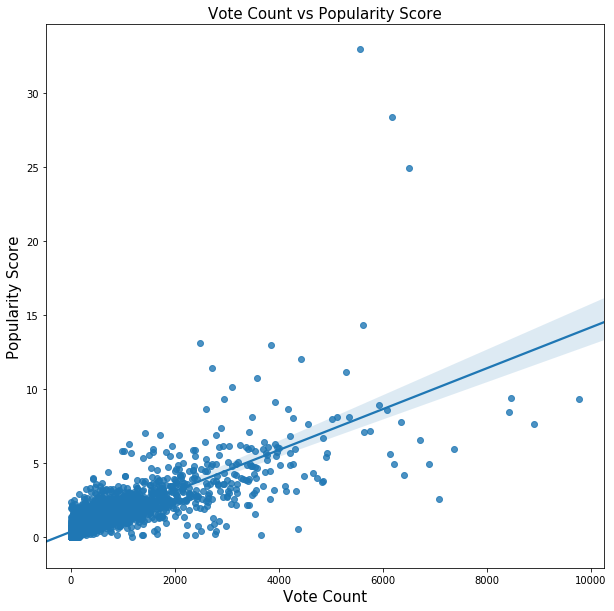

In [67]:
plt.figure(figsize = (10,10));
sns.regplot(x = 'vote_count' , y = 'popularity', data = profit);
plt.xlabel('Vote Count' , fontsize = 15);
plt.ylabel('Popularity Score', fontsize =15);
plt.title('Vote Count vs Popularity Score', fontsize = 15);

Comment on the results: <br>
As expected, the more popular a movie is the more vote counts it gets, and vice versa.

### What is the general trend between Release Year and Popularity?

We group by the release year and take the mean of all numerical columns

In [68]:
year_vs_pop = movies.groupby('release_year').mean()

In [69]:
year_vs_pop['release_year'] = year_vs_pop.index.get_level_values(0)

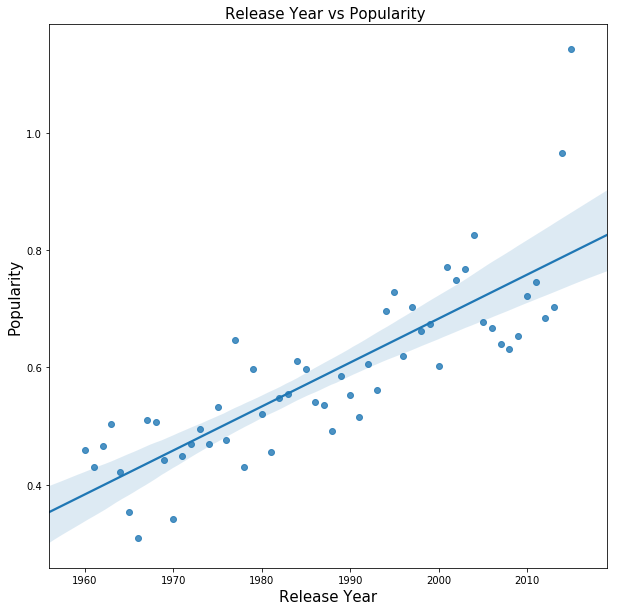

In [70]:
plt.figure(figsize = (10,10));
sns.regplot(x = 'release_year' , y = 'popularity', data = year_vs_pop);
plt.xlabel('Release Year', fontsize = 15); 
plt.ylabel('Popularity', fontsize = 15);
plt.title('Release Year vs Popularity ',fontsize = 15);

Comment on the results: <br>
The more recent a movie is the more likely it is popular.

### How did the movies budgets change over the years?

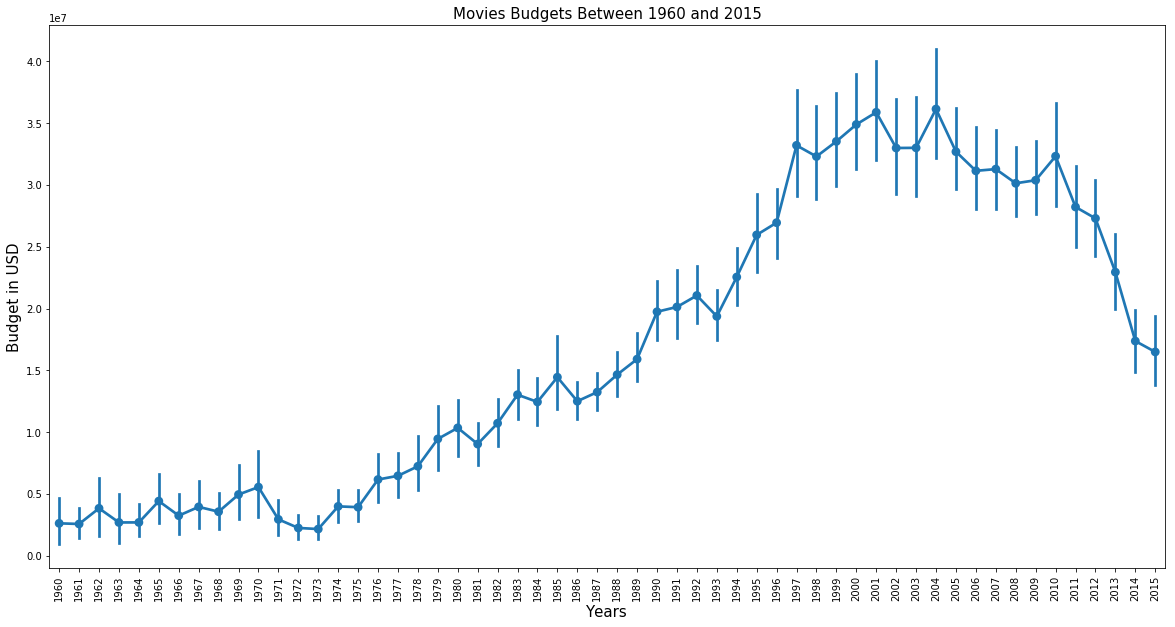

In [147]:
plt.figure(figsize = (20,10))
ax = sns.pointplot(x="release_year", y="budget", data=movies);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
plt.xlabel('Years',fontsize = 15);
plt.ylabel('Budget in USD',fontsize = 15);
plt.title('Movies Budgets Between 1960 and 2015',fontsize = 15);

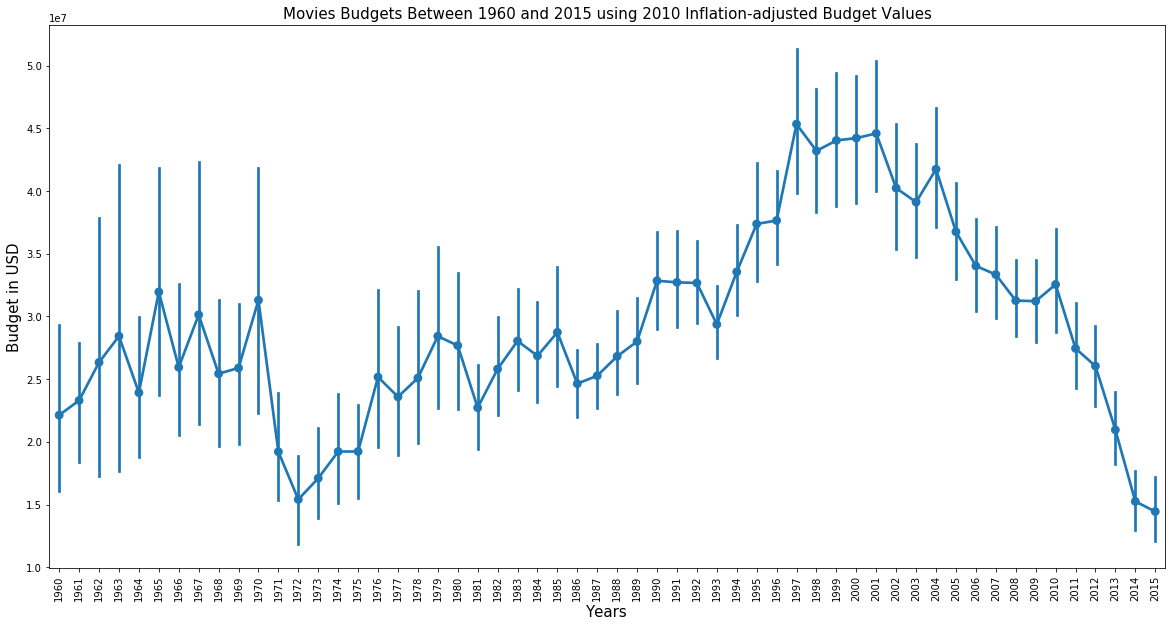

In [148]:
plt.figure(figsize = (20,10))
ax = sns.pointplot(x="release_year", y="budget_adj", data=movies);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
plt.xlabel('Years',fontsize = 15);
plt.ylabel('Budget in USD',fontsize = 15);
plt.title('Movies Budgets Between 1960 and 2015 using 2010 Inflation-adjusted Budget Values',fontsize = 15);

Comment on the results: <br>
Using the actual budget values, it seems that making movies in the 60s to 90s was cheaper than making movies in the 2000s to 2010s. However, when we use the inflation-adjusted values for budgets, it looks like making movies in the 2000s and 2010s is cheaper.

### How many movies were released per month?

In [72]:
movies['release_month'].value_counts()

9     1203
10    1032
12     894
8      842
6      765
1      747
5      740
3      738
11     735
4      722
7      713
2      628
Name: release_month, dtype: int64

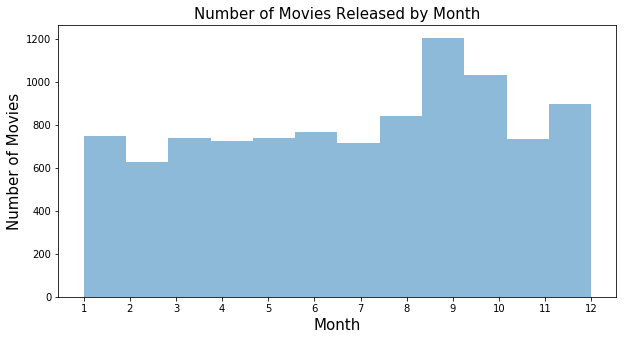

In [73]:
months = movies['release_month'].unique()
plt.figure(figsize = (10,5));
movies['release_month'].plot.hist(bins=12, alpha=0.5);
plt.xticks(np.arange(min(months), max(months)+1, 1));
plt.xlabel('Month', fontsize = 15); 
plt.ylabel('Number of Movies', fontsize = 15);
plt.title('Number of Movies Released by Month',fontsize = 15);

Comment on the results: <br>
The most movie releases happen in September, October, and December.

### What is the average runtime of movies? And what is the most common runtime?


In [151]:
runtime_mean = movies['runtime'].mean()

Text(113.37,1453.41,'Mean: 103.06')

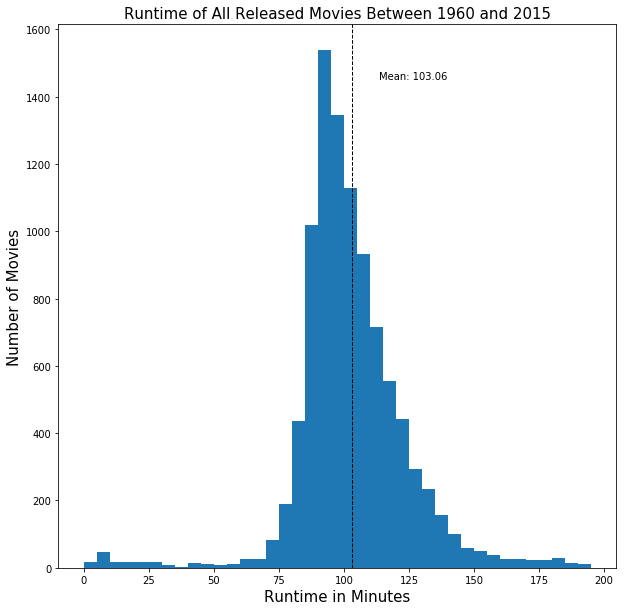

In [152]:
plt.figure(figsize = (10,10));
binval = np.arange(0,200,5)
y, x, _ = plt.hist(movies['runtime'],bins = binval);
plt.xlabel('Runtime in Minutes', fontsize = 15); 
plt.ylabel('Number of Movies', fontsize = 15);
plt.title('Runtime of All Released Movies Between 1960 and 2015',fontsize = 15);
plt.axvline(runtime_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(runtime_mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(runtime_mean))

Comment on the results: <br>

In [155]:
print('Most common runtime for movies is between {} and {} minutes long, and the average runtime is {:.2f} minutes.'.format(int(x[np.where(y == y.max())]), int(x[np.where(y == y.max())])+5, runtime_mean))

Most common runtime for movies is between 90 and 95 minutes long, and the average runtime is 103.06 minutes.


### What are the production companies with the most releases?

In [77]:
vals = [col for col in df if col.startswith('production_companies_')]
production_companies_freq = pd.melt(production_companies, value_vars=vals, value_name='production_companies')

In [78]:
production_companies_freq['production_companies'].value_counts(ascending=False)[0:30]

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
DreamWorks SKG                             88
20th Century Fox                           88
Village Roadshow Pictures                  88
BBC Films                                  87
Dimension Films                            82
United Artists                             76
Orion Pictures                    

Comment on the results: <br>
The production companies with the most releases are Universal Pictures, Warner Bros., and Paramount Pictures.

### What are the most popular and the least popular movies?

In [79]:
most_popular = movies.sort_values(by = 'popularity', ascending = False)[0:20]

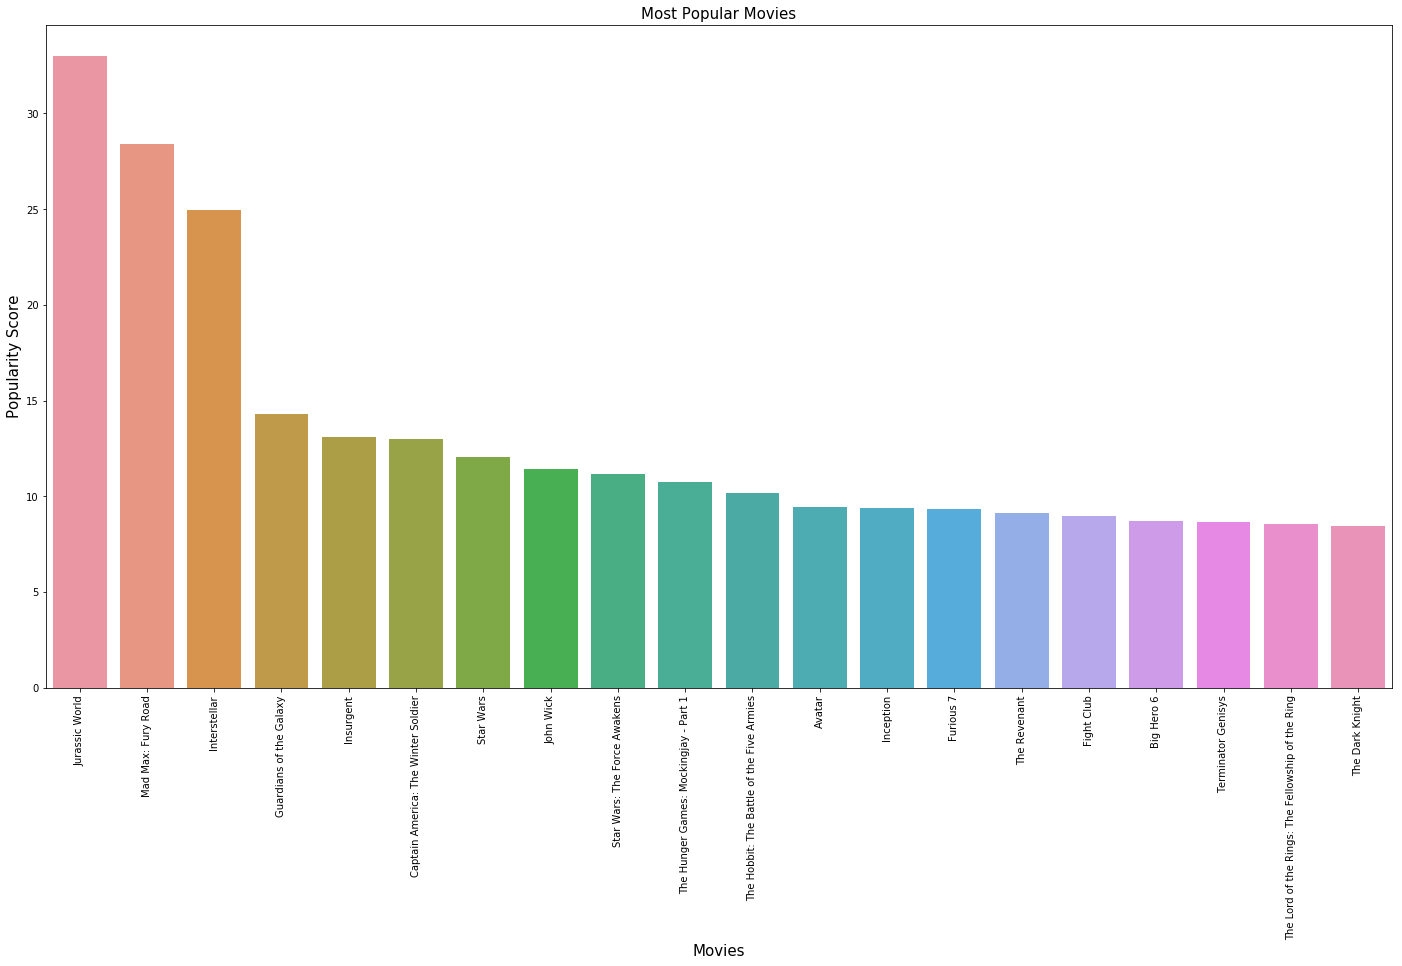

In [80]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x = 'original_title' , y = 'popularity', data=most_popular)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Movies', fontsize = 15)
plt.ylabel('Popularity Score', fontsize = 15)
plt.title('Most Popular Movies', fontsize = 15)
plt.show()

Comment on the results: <br>
The most popular movies are: Jurassic World, Mad Max: Fury Road, and Interstellar.

In [81]:
least_popular = movies.sort_values(by = 'popularity', ascending = True)[0:20]

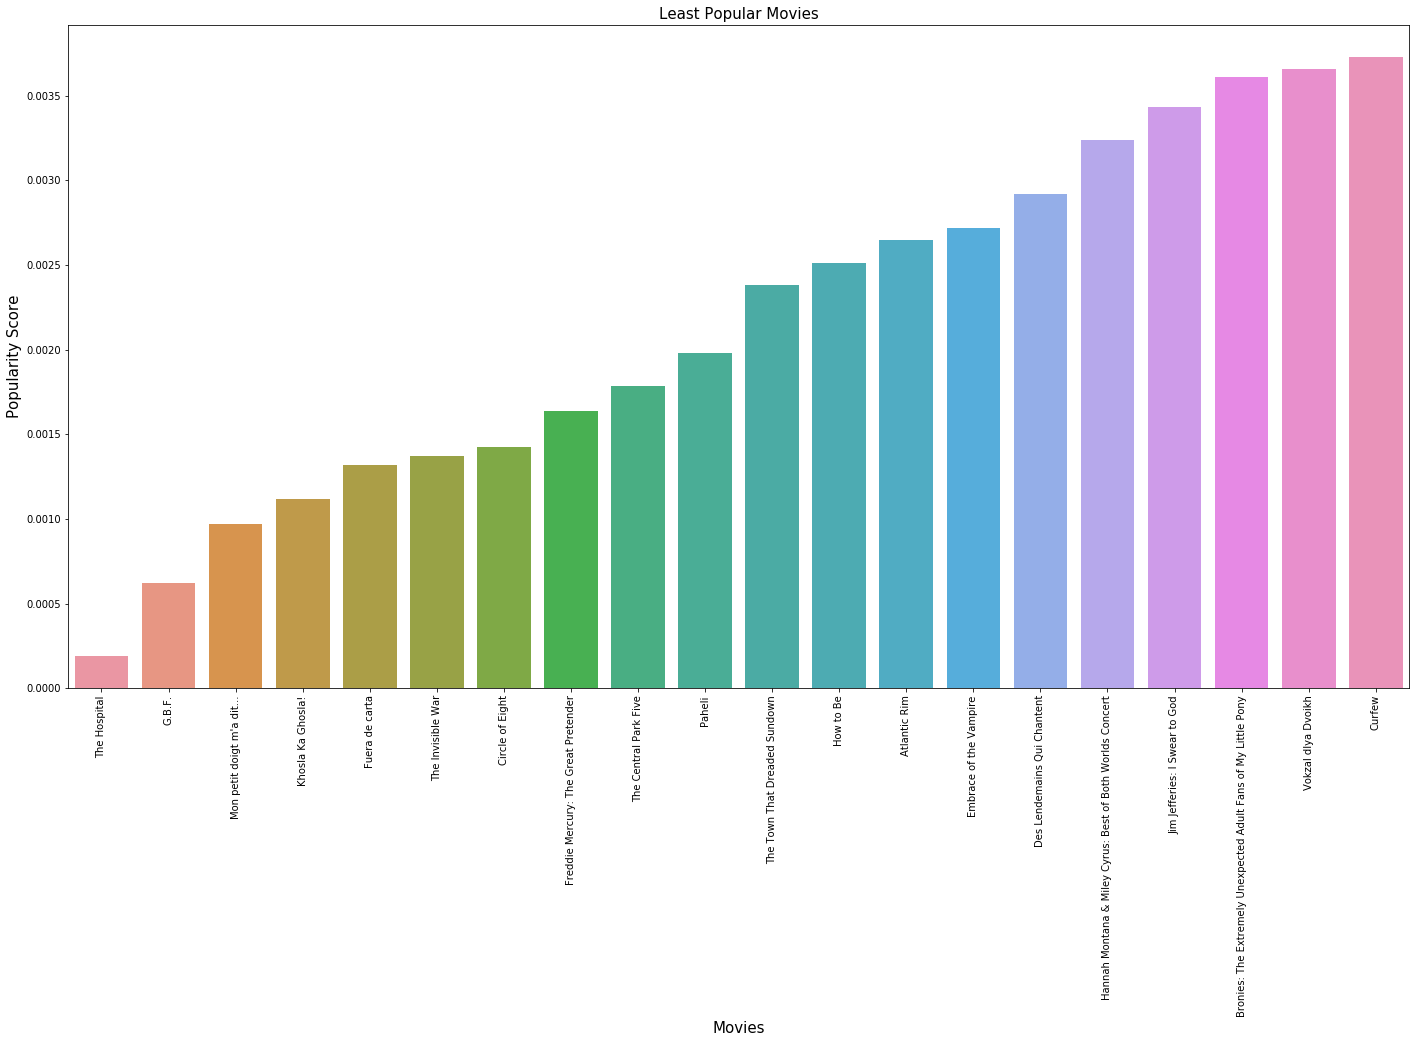

In [82]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x = 'original_title' , y = 'popularity', data=least_popular)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Movies', fontsize = 15)
plt.ylabel('Popularity Score', fontsize = 15)
plt.title('Least Popular Movies', fontsize = 15)
plt.show()

Comment on the results: <br>
The least popular movies are: The Hospital, G.B.F, and Mon petit doigt m'a dit.

### Who are the most popular movie stars?

We use the most popular 500 movies and extract the cast of each movie from cast_1 to cast_5

In [83]:
most_popular = movies.sort_values(by = 'popularity', ascending = False)[0:500]
cols = ['cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5']
new_df = pd.DataFrame(most_popular[cols].values.tolist(), index=most_popular.popularity).stack()
new_df = new_df.reset_index([0, 'popularity'])
new_df.columns = ['popularity', 'cast']

We add up the popularity score for the movie stars to add the score for those whose names appear more than once

In [84]:
new_df['tot_pop'] = new_df.groupby(['cast'], as_index=False)['popularity'].cumsum()

We drop the duplicated names and keep the names with the cumulative score (last)

In [85]:
new_df = new_df.drop_duplicates(subset='cast', keep='last')

We sort the values and plot the results

In [86]:
new_df = new_df.sort_values(by='tot_pop', ascending = False)

In [87]:
new_df = new_df[0:20]

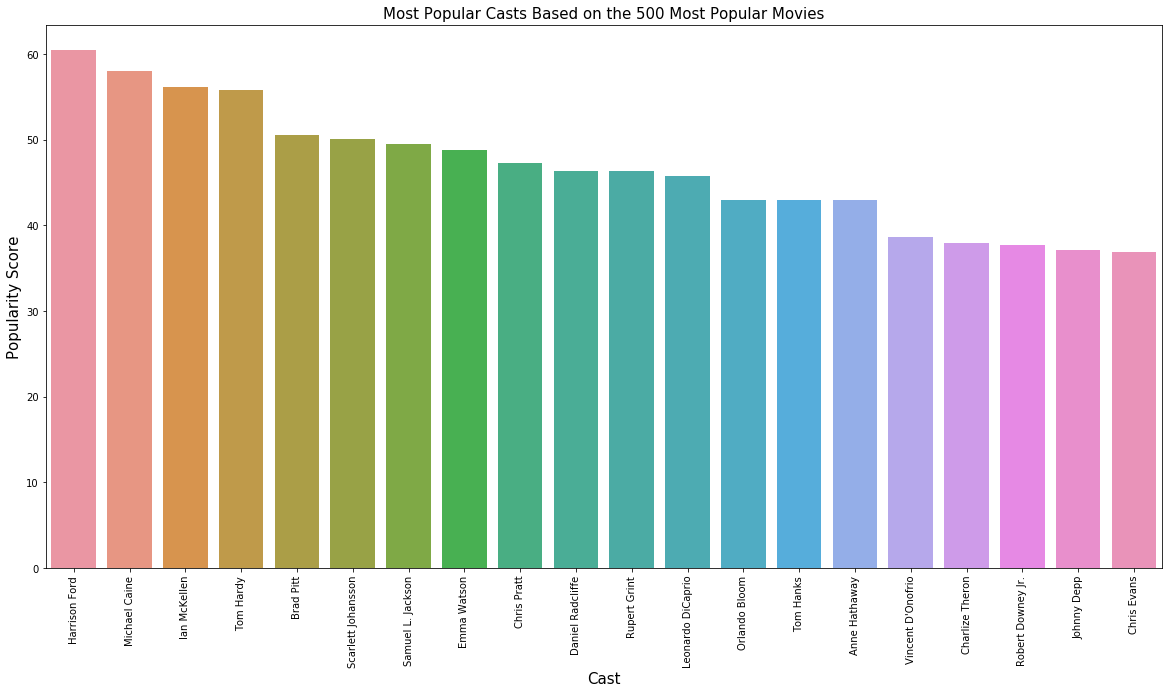

In [88]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x = 'cast' , y = 'tot_pop', data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Cast', fontsize=15)
plt.ylabel('Popularity Score', fontsize=15)
plt.title('Most Popular Casts Based on the 500 Most Popular Movies', fontsize=15)
plt.show()

Comment on the results: <br>
The most popular movie stars are: Harrison Ford, Michael Caine, and Ian Mckellen.

### How did the number of released movies change over the years?

In [89]:
df_years = movies.copy()

We get the unique years, then for each year we get the total number of movies and plot the results

In [90]:
number_of_movies = []
years = df_years['release_year'].unique()

for year in years:
    y = df_years[df_years['release_year'] == year]
    x = len(y.index)
    number_of_movies.append((year, x))

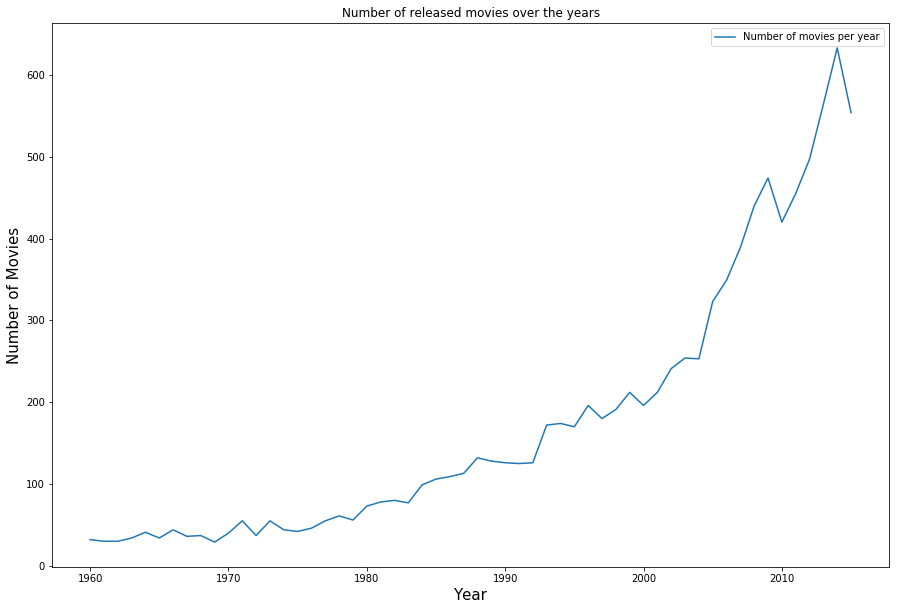

In [91]:
df_number_of_movies = pd.DataFrame(number_of_movies, columns=['release_year', 'number_of_movies']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_number_of_movies.plot(x='release_year', y='number_of_movies', kind='line', figsize=(15,10), title="Number of released movies over the years", label='Number of movies per year')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15);

Comment on the results: <br>
The number of movies released every year has been generally increasing from 1960 to 2015, with a significant increase between 2000 and 2010.

We can also plot the results as a bar plot, ordered from the year with the most releases to the year with the least releases.

In [92]:
order = movies['release_year'].value_counts().index

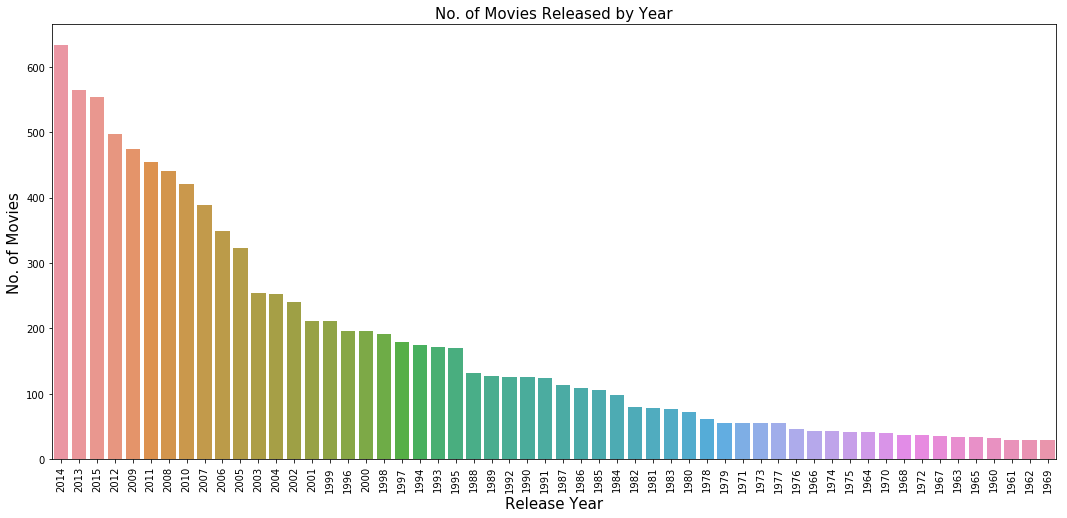

In [93]:
plt.figure(figsize=(18, 8))
ax=sns.countplot(x = 'release_year', data = movies, order = order);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.xlabel('Release Year', fontsize=15);
plt.ylabel('No. of Movies', fontsize=15);
plt.title('No. of Movies Released by Year', fontsize=15);

Comment on the results: <br>
Between 1960 and 2015, the years with the most movie releases are 2014, 2013, and 2015. The years with the least movie releases are 1961, 1962, and 1969.

### What are the properties of each category of movies based on the movie budget?

In [94]:
def get_levels(df, df_column_raw, df_column_lvl, bins, bin_labels):
    levels = {} #to store the levels
    
    for level in bin_labels:
        movie_lvl = df[df_column_lvl == level]
        
        #means
        avg_duration = movie_lvl['runtime'].mean()
        avg_budget = movie_lvl['budget_adj'].mean()
        avg_revenue = movie_lvl['revenue_adj'].mean()
        avg_vote = movie_lvl['vote_average'].mean()
        avg_vote_count = movie_lvl['vote_count'].mean()
        avg_pop = movie_lvl['popularity'].mean()

        #director
        director = movie_lvl.loc[:, 'director_1': 'director_5']
        freq_director = director.stack().value_counts().idxmax()
        #cast
        cast = movie_lvl.loc[:, 'cast_1': 'cast_5']
        freq_cast = cast.stack().value_counts().idxmax()
        #genres
        genres = movie_lvl.loc[:, 'genres_1': 'genres_5']
        freq_genres = genres.stack().value_counts().idxmax()
        #production companies
        production = movie_lvl.loc[:, 'production_companies_1': 'production_companies_5']
        freq_production = production.stack().value_counts().idxmax()
        #release_year
        release_year = movie_lvl['release_year'].value_counts().idxmax()

        #nested dictionary
        levels[level] = { 'Average Duration (in minutes)' : avg_duration, 
                                'Average Budget (in USD)' : avg_budget, 
                                'Average Revenue (in USD)' : avg_revenue, 
                                'Average Votes Count' : avg_vote_count,
                                'Average Vote out of 10' : avg_vote,
                                'Average Popularity Score' : avg_pop,
                                'Most Frequent Genre' : freq_genres,
                                'Most Frequent Cast' : freq_cast,
                                'Most Frequent Director' : freq_director, 
                                'Most Frequent Release Year' : release_year,
                                'Most Frequent Production Company' : freq_production}

    movie_classes = []
    frames = []

    for movie_class, d in levels.items():
        movie_classes.append(movie_class)
        frames.append(pd.DataFrame.from_dict(d, orient='index'))

    properties = pd.concat(frames, keys=movie_classes)  
    properties.columns = ['Result']
    return properties

In [157]:
df_rev_adj = movies.copy()
df_rev_adj['budget_adj'].describe()

count    9.759000e+03
mean     2.987047e+07
std      3.328482e+07
min      0.000000e+00
25%      9.519816e+06
50%      2.261721e+07
75%      3.556058e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [158]:
bins = [df_rev_adj['budget_adj'].describe()[3],
        df_rev_adj['budget_adj'].describe()[4],
        df_rev_adj['budget_adj'].describe()[6],
        df_rev_adj['budget_adj'].describe()[7]]
bin_labels = ['Low Budget', 'Moderate Budget', 'High Budget']
df_rev_adj['budget_level'] = pd.cut(df_rev_adj['budget_adj'], bins, labels=bin_labels)

In [159]:
get_levels(df_rev_adj, df_rev_adj['budget_adj'], df_rev_adj['budget_level'], bins, bin_labels)

Result
Low Budget      Average Duration (in minutes)                95.9335
                Average Budget (in USD)                  4.36763e+06
                Average Revenue (in USD)                 2.11764e+07
                Average Votes Count                          108.877
                Average Vote out of 10                       5.91243
                Average Popularity Score                    0.488001
                Most Frequent Genre                            Drama
                Most Frequent Cast                       Danny Trejo
                Most Frequent Director             Lauren Montgomery
                Most Frequent Release Year                      2014
                Most Frequent Production Company  Paramount Pictures
Moderate Budget Average Duration (in minutes)                101.838
                Average Budget (in USD)                  2.25461e+07
                Average Revenue (in USD)                 5.43759e+07
                Average Votes Count                          134.721
                Average Vote out of 10                       5.95744
                Average Popularity Score                    0.540018
                Most Frequent Genre                            Drama
                Most Frequent Cast                       John Cusack
                Most Frequent Director                   Woody Allen
                Most Frequent Release Year                      2012
                Most Frequent Production Company  Universal Pictures
High Budget     Average Duration (in minutes)                118.636
                Average Budget (in USD)                  7.11349e+07
                Average Revenue (in USD)                 1.84787e+08
                Average Votes Count                          594.302
                Average Vote out of 10                       5.89536
                Average Popularity Score                     1.25281
                Most Frequent Genre                            Drama
                Most Frequent Cast                      Bruce Willis
                Most Frequent Director              Steven Spielberg
                Most Frequent Release Year                      2009
                Most Frequent Production Company        Warner Bros.

Comment on the results: <br>
High Budget movies have significantly better revenue, average popularity scores, and average votes count, however, the budget of a movie is a weak indicator to its avergae vote score.

### What are the properties of each category of movies based on the movie rating?

In [98]:
df_rating = movies.copy()
df_rating['vote_average'].describe()

count    9759.000000
mean        5.964535
std         0.912967
min         1.500000
25%         5.400000
50%         6.000000
75%         6.600000
max         8.700000
Name: vote_average, dtype: float64

In [99]:
bins = [df_rating['vote_average'].describe()[3],
        df_rating['vote_average'].describe()[4],
        df_rating['vote_average'].describe()[6],
        df_rating['vote_average'].describe()[7]]
bin_labels = ['Low Rating', 'Moderate Rating', 'High Rating']
df_rating['vote_level'] = pd.cut(df_rating['vote_average'], bins, labels=bin_labels)

In [100]:
get_levels(df_rating, df_rating['vote_average'], df_rating['vote_level'], bins, bin_labels)

Result
Low Rating      Average Duration (in minutes)                   96.0561
                Average Budget (in USD)                     2.80579e+07
                Average Revenue (in USD)                    3.60747e+07
                Average Votes Count                             73.4528
                Average Vote out of 10                          4.80661
                Average Popularity Score                       0.443139
                Most Frequent Genre                              Comedy
                Most Frequent Cast                Jean-Claude Van Damme
                Most Frequent Director                         Uwe Boll
                Most Frequent Release Year                         2014
                Most Frequent Production Company           Warner Bros.
Moderate Rating Average Duration (in minutes)                   103.779
                Average Budget (in USD)                     3.13707e+07
                Average Revenue (in USD)                    7.95375e+07
                Average Votes Count                             206.742
                Average Vote out of 10                           6.0583
                Average Popularity Score                       0.667733
                Most Frequent Genre                               Drama
                Most Frequent Cast                       Susan Sarandon
                Most Frequent Director                      Woody Allen
                Most Frequent Release Year                         2013
                Most Frequent Production Company     Universal Pictures
High Rating     Average Duration (in minutes)                   109.642
                Average Budget (in USD)                     2.86414e+07
                Average Revenue (in USD)                    1.21595e+08
                Average Votes Count                             506.072
                Average Vote out of 10                          7.10638
                Average Popularity Score                        1.05023
                Most Frequent Genre                               Drama
                Most Frequent Cast                       Robert De Niro
                Most Frequent Director                  Martin Scorsese
                Most Frequent Release Year                         2014
                Most Frequent Production Company           Warner Bros.

Comment on the results: <br>
Highly rated movies have significantly better revenue, average popularity scores, and average votes count, but the average budget is not an indicator on the movie vote score (as seen earlier, the correlation factor between vote_average and budget_adj is close to zero (0.02)).

<a id='conclusions'></a>
## Conclusions

### The questions this EDA explored and a summary of their findings: <br>
1. What attributes have the highest correlation between each other? <br>
The highest correlations are budget-budget_adj and revenue-revenue_adj which is expected since they are dependent on each other. However, remarkably high correlations are popularity-vote_count, revenue-vote_count, and budget-revenue. <br>
2. What genre was the most released each year? And how many movies were released under each genre? <br>
Most of the movies released every year from 1960 to 2015 fall under the Drama genre, except for 11 years in this 55-year-long period when the most releases were Comedy movies.
The most releases between 1960 and 2015 are Drama and Comedy movies, while the least releases are in the TV Movie and Foreign genres. <br>
3. What is the average rating of each genre? <br>
The Documentary genre has the highest average rating (vote score), while the Horror genre receives in average the least rating among all the genres. <br>
4. What is the biggest production of each year from 1960 to 2015? <br>
As listed above. <br>
5. What is the highest-grossing movie of each year between 1960 and 2015? <br>
As listed above. 
The results make sense because most of these movies are also listed as the biggest productions of their respective release years. <br>
6. What is the general trend between popularity and the vote count? <br>
As expected, the more popular a movie is the more vote counts it gets, and vice versa. <br>
7. What is the general trend between Release Year and Popularity? <br>
The more recent a movie is the more likely it is popular. <br>
8. How did the movies budgets change over the years? <br>
Using the actual budget values, it seems that making movies in the 60s to 90s was cheaper than making movies in the 2000s to 2010s. However, when we use the inflation-adjusted values for budgets, it looks like making movies in the 2000s and 2010s is cheaper. <br>
9. How many movies were released per month? <br>
The most movie releases happen in September, October, and December. <br>
10. What is the average runtime of movies? And what is the most common runtime? <br>
Most common runtime for movies is between 90 and 95 minutes long, and the average runtime is 103.06 minutes. <br>
11. What are the production companies with the most releases? <br>
The production companies with the most releases are Universal Pictures, Warner Bros., and Paramount Pictures. <br>
12. What are the most popular and the least popular movies? <br>
The most popular movies are: Jurassic World, Mad Max: Fury Road, and Interstellar. The least popular movies are: The Hospital, G.B.F, and Mon petit doigt m'a dit. <br>
13. Who are the most popular movie stars? <br>
The most popular movie stars are: Harrison Ford, Michael Caine, and Ian Mckellen. <br>
14. How did the number of released movies change over the years? <br>
The number of movies released every year has been generally increasing from 1960 to 2015, with a significant increase between 2000 and 2010. Between 1960 and 2015, the years with the most movie releases are 2014, 2013, and 2015. The years with the least movie releases are 1961, 1962, and 1969. <br>
15. What are the properties of each category of movies based on the movie budget? <br>
High Budget movies have significantly better revenue, average popularity scores, and average votes count, however, the budget of a movie is a weak indicator to its avergae vote score. <br>
16. What are the properties of each category of movies based on the movie rating? <br>
Highly rated movies have significantly better revenue, average popularity scores, and average votes count, but the average budget is not an indicator on the movie vote score (as seen earlier, the correlation factor between vote_average and budget_adj is close to zero (0.02)). <br>

### Limitations
We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided data in the dataset. For example, the dataset does not confirm that every release is listed and all the information listed for each release is accurate. <br>
There is no normalization is considered during this analysis thus the analysis is limited to the numerical values of the revenue and the budget. <br>
Amost 50% of the movies in this dataset had missing or NULL values for the budget, budget_adj, revenue, revenue_adj. Thus, amputating this much of data might skew the analysis and could show unintentional bias towards the relationships being analyzed.

## Submitting the Project 

In [180]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0